<a href="https://colab.research.google.com/github/BDR2939/Advanced-statistics/blob/master/hw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Advanced Statistics for Data Science (Spring 2023)
# Home Assignment 2
#### Topics:
- Probability review
- Solving LS using SVD
- Distributional Properties of the Linear Model


#### Due: 09/05/2023 by 18:30

#### Instructions:
- Write your name, Student ID, and date in the cell below. 
- Submit a copy of this notebook with code filled in the relevant places as the solution of coding excercises.
- For theoretic excercises, you can either write your solution in the notebook using $\LaTeX$ or submit additional notes.

<hr>
<hr>


**Name**: Roni Ben Dom

**Date**: 08/05/2023

$\newcommand{\Id}{{\mathbf{I}}}  
\newcommand{\SSE}{\mathsf{SSE}}
\newcommand{\SSR}{\mathsf{SSR}}
\newcommand{\MSE}{\mathsf{MSE}}
\newcommand{\simiid}{\overset{iid}{\sim}}
\newcommand{\ex}{\mathbb E}
\newcommand{\var}{\mathrm{Var}}
\newcommand{\Cov}[2]{{\mathrm{Cov}  \left(#1, #2 \right)}}
\newcommand{\one}[1]{\mathbf 1 {\left\{#1\right\}}}
\newcommand{\SE}[1]{\mathrm{SE} \left[#1\right]}
\newcommand{\reals}{\mathbb R}
\newcommand{\Ncal}{\mathcal N}
\newcommand{\abs}[1]{\ensuremath{\left\vert#1\right\vert}}
\newcommand{\rank}{\operatorname{rank}}
\newcommand{\tr}{\operatorname{Tr}}
\newcommand{\diag}{\operatorname{diag}}
\newcommand{\sign}{\operatorname{sign}}
$


<hr>
<hr>

## Problem 1 (The Normal Distribution)


1. Let $Z = (Z_1,\ldots,Z_9)^\top \sim 𝓝(\mu, I_9)$ where $\mu \in \reals^9$. Show that $3Z_1-Z_2+Z_3-Z_4$ is independent of $Z_1 + Z_2 - Z_3 + Z_4 - Z_5$.

2. Suppose that $Z \sim 𝓝(\mu, I_n)$ and let $X = a^\top{Z}$ and $Y = B^\top{Z}$ for a non-random vectors $a \in \reals^n$ and a non-random matrix $B \in \reals^{n \times p}$. Find conditions on $a$ and $B$ such that $X$ is independent of $Y$.

3. Suppose that $Z_{ij} \simiid 𝓝(0, 1)$ for $i= 1,\ldots,I$ and $j=1,\ldots,J$. Define 
$$
\bar{Z}_{i\bullet} := \frac{1}{J} \sum_{j=1}^J Z_{ij},\qquad \bar{Z}_{\bullet j} := \frac{1}{I} \sum_{i=1}^I Z_{ij}, \qquad \bar{Z}_{\bullet \bullet} := \frac{1}{IJ} \sum_{j=1}^J \sum_{i=1}^I Z_{ij}
$$
- Is $\bar{Z}_{i\bullet}$ independent of $\bar{Z}_{\bullet j}$ ?
- Is $\bar{Z}_{1\bullet}$ independent of $\bar{Z}_{2\bullet}$ ?
- Is $\bar{Z}_{i\bullet} - \bar{Z}_{\bullet \bullet}$ independent of $\bar{Z}_{i\bullet}$ ?

4. Consider the variance-covariance matrix 
$$
\bar{\Sigma} = \begin{bmatrix} 1 & -.25 \\
-.25 & 1
\end{bmatrix}
$$
Using as many samples as you need from the standard normal distribution (e.g. ``numpy.random.randn``), generate $N = 1000$ independent samples from the bivariate normal distribution $(0, \bar{\Sigma})$ (you'll get $N$ pairs). Illustrate these samples over a scatter plot.

5. Consider the region in $\reals^2$:
$$
A = \{ (x,y)\,: 0 \leq x \leq 1, 2x \leq y \leq 3\}
$$
For $(X_1, X_2) \sim 𝓝(0, \bar{\Sigma})$, estimate 
$$
\Pr\left[ (X_1, X_2) \in A \right]
$$
in two ways: 
    1. Evaluating the integral over the Gaussian density function **numerically**. Set the number of grid points $G$ in every axis to be at least $500$.
    2. Estimating the fraction of samples in 4 that falls in the region $A$



1. To show that $3Z_1-Z_2+Z_3-Z_4$ is independent of $Z_1 + Z_2 - Z_3 + Z_4 - Z_5$, we need to show that their covariance is zero.

  First, we compute the mean and covariance of $Z$. We have $E[Z_i] = \mu_i$ for all $i=1,\ldots,9$, and $\operatorname{Var}(Z_i) = 1$ for all $i=1,\ldots,9$. Since $Z$ is a multivariate normal distribution with identity covariance, it follows that $Z$ is also uncorrelated, i.e., $\operatorname{Cov}(Z_i,Z_j) = 0$ for all $i\neq j$.

  Let $X = 3Z_1-Z_2+Z_3-Z_4$ and $Y = Z_1 + Z_2 - Z_3 + Z_4 - Z_5$. Then, the covariance between $X$ and $Y$ is:

  $
  \operatorname{Cov}(X,Y) = \operatorname{Cov}(3Z_1-Z_2+Z_3-Z_4, Z_1 + Z_2 - Z_3 + Z_4 - Z_5) = 3\operatorname{Cov}(Z_1, Z_1)  + 3\operatorname{Cov}(Z_1, Z_2) - 3\operatorname{Cov}(Z_1, Z_3) + 3\operatorname{Cov}(Z_1, Z_4) - 3\operatorname{Cov}(Z_1, Z_5) - \operatorname{Cov}(Z_2, Z_1) -\operatorname{Cov}(Z_2, Z_2) + \operatorname{Cov}(Z_2, Z_3) - \operatorname{Cov}(Z_2, Z_4) +\operatorname{Cov}(Z_2, Z_5) + \operatorname{Cov}(Z_3, Z_1)  + \operatorname{Cov}(Z_3, Z_2) - \operatorname{Cov}(Z_3, Z_3) + \operatorname{Cov}(Z_3, Z_4) - \operatorname{Cov}(Z_3, Z_5) - \operatorname{Cov}(Z_4, Z_1) -\operatorname{Cov}(Z_4, Z_2) + \operatorname{Cov}(Z_4, Z_3) - \operatorname{Cov}(Z_4, Z_4) +\operatorname{Cov}(Z_4, Z_5) = 3 + 0 - 0 + 0 - 0 - 0 - 1 + 0 - 0 + 0 + 0 + 0 - 1 + 0 - 0 - 0 - 0 + 0 - 1 + 0 = 0$

  As shown in class an affine transformation of a normal vector is a normal vector, hence 𝑋,𝑌 are normally distributed thus cov(𝑋,𝑌)=0 implies 𝑋,𝑌 are independent.

2. Let $Z \sim (\mu, I_n)$ and let $X = a^\top{Z}$ and $Y = B^\top{Z} \Rightarrow \operatorname{Cov}(X, Y) = \operatorname{Cov}(a^\top{Z}, B^\top{Z}) = a^{T}\operatorname{Cov}(Z, Z)B = a^{T}\operatorname{Var}(Z, Z)B = a^{T}B$

  Same as in 1, cov(X, Y) = 0 for normal distributed variables implies independence, hence, we want $\operatorname{Cov}(X, Y) = a^{T}B = 0$
  $$ \Downarrow $$
  $$ a^{T}B = 0 \; \text{is the desired condition} $$

3. 1.  $\operatorname{Cov}(\bar{Z}_{i\bullet}, \bar{Z}_{\bullet j}) = \operatorname{Cov}(\frac{1}{J} \sum_{j=1}^J Z_{ij}, \frac{1}{I} \sum_{i=1}^I Z_{ij}) = \frac{1}{J \cdot I}\operatorname{Cov}( \sum_{j=1}^J Z_{ij}, \sum_{i=1}^I Z_{ij}) = \frac{1}{J \cdot I}\operatorname{Cov}(Z_{ij}, Z_{ij}) = \frac{1}{J \cdot I}\operatorname{Var}(Z_{ij}, Z_{ij}) = \frac{1}{J \cdot I}\cdot 1 \neq 0$
$$⇓$$
$$\bar{Z}_{i\bullet} \; \text{and} \; \bar{Z}_{\bullet j} \;\; \text{are not independent}$$

  2. $\operatorname{Cov}(\bar{Z}_{1\bullet}, \bar{Z}_{2\bullet}) = \operatorname{Cov}(\sum_{j=1}^J Z_{1j}, \frac{1}{2} \sum_{j=1}^J Z_{2j}) = \frac{1}{2}\operatorname{Cov}(\sum_{j=1}^J Z_{1j}, \sum_{j=1}^J Z_{2j})$
  There are no common $ Z_{ij} $ in the covariance, and since every pair of $Z_{ij}, Z_{kl}$ where $i \neq k \; OR \; j \neq l$ are independent, the covariance is 0, hence $\bar{Z}_{1\bullet}, \bar{Z}_{2\bullet}$ are independant (normally distributed variables $⇒$ uncorrelatedness implies independence

  3. $\operatorname{Cov}(\bar{Z}_{i'\bullet} - \bar{Z}_{\bullet \bullet}\,, \bar{Z}_{i'\bullet}) = \operatorname{Cov}(\frac{1}{J} \sum_{j=1}^J Z_{i'j} - \frac{1}{IJ} \sum_{j=1}^J \sum_{i=1}^I Z_{ij}, \frac{1}{J} \sum_{j=1}^J Z_{i'j}) =\\ \operatorname{Cov}(\frac{I - 1}{IJ} \sum_{j=1}^J Z_{i'j} - \frac{1}{IJ} \sum_{j=1}^J \sum_{i=1, i \neq i'}^I Z_{ij}, \frac{1}{J} \sum_{j=1}^J Z_{i'j}) = \\
\operatorname{Cov}(\frac{I - 1}{IJ} \sum_{j=1}^J Z_{i'j}, \frac{1}{J} \sum_{j=1}^J Z_{i'j}) - {\operatorname{Cov}(\frac{1}{IJ} \sum_{j=1}^J \sum_{i=1, i \neq i'}^I Z_{ij}, \frac{1}{J} \sum_{j=1}^J Z_{i'j})} $ <br>
As we can see on the left, before the minus, all $Z_{i'j}$ exist in both terms in the covariance, therefore, the outcome of this term is not 0, while in the second term, on the right, no shared $Z_{ij}$ between the terms in the covariance, hence the outcome is 0, so the overall result is not 0, and $\bar{Z}_{i'\bullet} - \bar{Z}_{\bullet \bullet}\,, \bar{Z}_{i'\bullet}$ are not independant

4. 

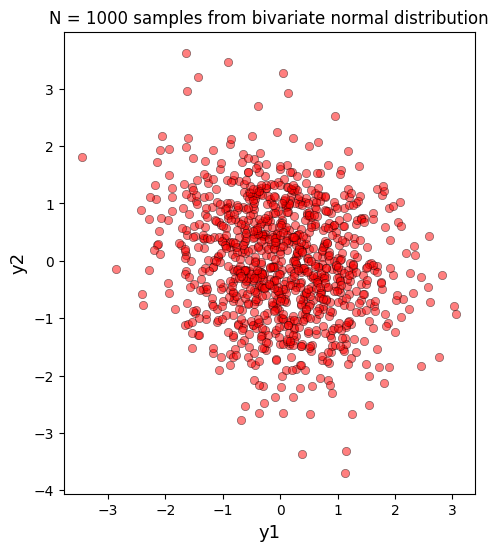

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the desired distribution to sample from:
d = 2 # Number of dimensions
mean = np.matrix([[0], [0]])
covariance = np.matrix([
[1, -0.25],
[-0.25, 1]
])
 
# Compute the Decomposition:
A = np.linalg.cholesky(covariance)
 
# Sample X from standard normal
n = 1000 # Samples to draw
Z = np.random.normal(size=(d, n))
 
# Apply the transformation
Y = A.dot(Z) + mean
 
# Plot the samples
fig, ax = plt.subplots(figsize=(9, 6))
ax.plot(Y[0,:], Y[1,:], 'ro', alpha=.5,
        markeredgecolor='k', markeredgewidth=0.5)
ax.set_xlabel('y1', fontsize=13)
ax.set_ylabel('y2', fontsize=13)
ax.set_aspect('equal')
ax.set_title(f'N = {n} samples from bivariate normal distribution')
plt.show()

5. 1.

In [ ]:
from scipy.stats import multivariate_normal

mean = [0, 0]
covariance = [
[1, -0.25],
[-0.25, 1]
]

rv = multivariate_normal(mean, covariance)

intergal_value = 0

step_y_1 = 1/500

for y_1 in np.linspace(0, 1, 500):

  step_y_2 = (3-(2*y_1)) / 500
  y_2 = np.linspace(2*y_1, 3, 500)
  x = [[y_1 + (step_y_1 / 2), y_2[i] + (step_y_2 / 2)] for i in range(len(y_2))]

  local_pdf = rv.pdf(x)

  intergal_value += np.sum(step_y_1 * step_y_2 * local_pdf)

print(f'The numerical evaluation of the integral is {intergal_value} ∼ {100*intergal_value:.2f}%')


The numerical evaluation of the integral is 0.06405364798406814 ∼ 6.41%


5. 2. 

In [ ]:
x = np.array(Y[0,:]).reshape(-1)
y = np.array(Y[1,:]).reshape(-1)

#select all x values in A
x_valid_indices = np.where((0 < x) & (x < 1))[0]

x = x[x_valid_indices]
y = y[x_valid_indices]

#Select all points in y that satisfy the demand
valid_points = np.where((2*x < y) & (y < 3))[0]

print(f'The fraction of samples in 4 that falls in the region of A is {len(valid_points) * 100 / n}%')

The fraction of samples in 4 that falls in the region of A is 7.2%


## Problem 2 (Conditional Distribution)
$\newcommand{\ex}{\mathbb E}$

For
$$
\begin{bmatrix}
X \\
Y \\
Z 
\end{bmatrix} \sim \mathcal{N} \left( \begin{bmatrix} 1 \\
2\\
3
\end{bmatrix}, \begin{bmatrix}
 4 & -1 & 3 \\
 -1 & 2 & -3 \\
 3 & -3 & 8
\end{bmatrix}
\right)
$$
find (numerically):
1. The distribution of $X$ given that $Y = 1$.
2. The joint distribution of $X$ and $Y$ given $Z = 1$.
3. The distribution of $Y$ given that $Z = 2$ and $X = 3$.
4. $Pr(Y \in [-1,1] | Z=4, X=3)$
<hr>
<hr>

1. $σ_{X} = 2, \; \sigma_{Y} = \sqrt{2}, \; \rho\sigma_{X}\sigma_{Y} = \rho\cdot 2 \cdot\sqrt{2} = -1 \Rightarrow \rho = \frac{-1}{2\cdot\sqrt{2}}$<br>
$𝓛\left(X|Y = 1\right) = 𝓝\left(\mu_{X}+\rho\sigma_{X}\cdot\frac{Y-\mu_{Y}}{\sigma_{Y}}, \sigma_{X}^2\left(1-\rho^2\right)\right) = 𝓝\left(1+\frac{-1\cdot 2}{2\cdot\sqrt{2}}\cdot\frac{1-2}{\sqrt{2}}, 4\cdot\left(1-\frac{1}{8}\right)\right) = 𝓝\left(1+\frac{-1}{\sqrt{2}}\cdot\frac{-1}{\sqrt{2}}, 4-0.5\right) = 𝓝\left(1.5, 3.5\right)$<br>
$\Rightarrow 𝓛\left(X|Y = 1\right) \sim 𝓝\left(1.5, 3.5\right)$

2. $\mu = 𝔼\left[[X, Y]|Z = 1\right] = \begin{bmatrix} 1 \\ 2 \end{bmatrix} + \begin{bmatrix} 3 \\ -3 \end{bmatrix}\cdot\frac{1}{8}\left(1 - 3\right) = \begin{bmatrix} 1 \\ 2 \end{bmatrix} + \begin{bmatrix} \frac{-6}{8} \\ \frac{6}{8} \end{bmatrix} = \begin{bmatrix} \frac{1}{4} \\ \frac{11}{4} \end{bmatrix}$<br>

  $\sigma^2 = \operatorname{Var}\left[[X, Y]|Z = 1\right] = \begin{bmatrix}
  4 & -1 \\
  -1 & 2 \\
  \end{bmatrix} - \begin{bmatrix} 3 \\ -3 \end{bmatrix}\cdot\frac{1}{8}\begin{bmatrix} 3 ,\ -3 \end{bmatrix} =\begin{bmatrix}
  4 & -1 \\
  -1 & 2 \\
  \end{bmatrix} - \begin{bmatrix} \frac{9}{8} & \frac{-9}{8}\\ \frac{-9}{8} & \frac{9}{8} \end{bmatrix} = \begin{bmatrix}
  2.875 & 0.125 \\
  0.125 & 0.875 \\
  \end{bmatrix}$<br>
  $\Rightarrow 𝓛\left(XY|Z = 1\right) \sim  𝓝\left(\begin{bmatrix} \frac{1}{4} \\ \frac{11}{4} \end{bmatrix}, \begin{bmatrix}
  2.875 & 0.125 \\
  0.125 & 0.875 \\
  \end{bmatrix}\right)$

3.  $\mu = 𝔼\left[Y|X = 3, Z = 2\right] = 2 + \begin{bmatrix} -1 ,\ -3 \end{bmatrix} \begin{bmatrix}
  4 & 3 \\
  3 & 8 \\
  \end{bmatrix}^{-1}\left(\begin{bmatrix} 3 \\ 2 \end{bmatrix} - \begin{bmatrix} 1 \\ 3 \end{bmatrix}\right) = 2 + \frac{1}{23}\begin{bmatrix} -1 ,\ -3 \end{bmatrix}\begin{bmatrix}
  8 & -3 \\
  -3 & 4 \\
  \end{bmatrix}\begin{bmatrix} 2 \\ -1 \end{bmatrix} = 2 + \frac{11}{23} = \frac{57}{23}$<br>

  $\sigma^2 = \operatorname{Var}\left[Y|X = 3, Z = 2\right] = 2 - \begin{bmatrix} -1 ,\ -3 \end{bmatrix} \begin{bmatrix}
  4 & 3 \\
  3 & 8 \\
  \end{bmatrix}^{-1}\begin{bmatrix} -1 \\ -3 \end{bmatrix} = 2 - \frac{1}{23}\begin{bmatrix} -1 ,\ -3 \end{bmatrix}\begin{bmatrix}
  8 & -3 \\
  -3 & 4 \\
  \end{bmatrix}\begin{bmatrix} -1 \\ -3 \end{bmatrix} = 2 - \frac{26}{23} = \frac{20}{23}$<br>
  $\Rightarrow 𝓛\left(Y|X = 3, Z = 2\right) \sim  𝓝\left(\frac{57}{23}, \frac{20}{23}\right)$

4. Assuming the intention is  $Pr(Y \in [-1,1] | Z=2, X=3)$:
We would like to find $Φ(1)-Φ(-1)$ for $𝓝\left(\frac{57}{23}, \frac{20}{23}\right)$<br>


In [ ]:
from math import erf
from IPython.display import display, Latex

def normal_dist_CDF(mu, sigma, x):
  return 0.5 * (1 + erf((x-mu)/(sigma * (2 ** 0.5))))

display(Latex(f'$Pr(Y \in [-1,1] | Z=2, X=3) = {normal_dist_CDF(57/23, np.sqrt(20/23), 1) - normal_dist_CDF(57/23, np.sqrt(20/23), -1):.2f}$'))


<IPython.core.display.Latex object>

  Otherwise: <br>
  for $Pr(Y \in [-1,1] | Z=4, X=3)$ lets calculate mean and veriance<br>
  $\mu = 𝔼\left[Y|X = 3, Z = 4\right] = 2 + \begin{bmatrix} -1 ,\ -3 \end{bmatrix} \begin{bmatrix}
  4 & 3 \\
  3 & 8 \\
  \end{bmatrix}^{-1}\left(\begin{bmatrix} 3 \\ 4 \end{bmatrix} - \begin{bmatrix} 1 \\ 3 \end{bmatrix}\right) = 2 + \frac{1}{23}\begin{bmatrix} -1 ,\ -3 \end{bmatrix}\begin{bmatrix}
  8 & -3 \\
  -3 & 4 \\
  \end{bmatrix}\begin{bmatrix} 2 \\ 1 \end{bmatrix} = 2 + \frac{-7}{23} = \frac{39}{23}$<br>

  $\sigma^2 = \operatorname{Var}\left[Y|X = 3, Z = 4\right] = 2 - \begin{bmatrix} -1 ,\ -3 \end{bmatrix} \begin{bmatrix}
  4 & 3 \\
  3 & 8 \\
  \end{bmatrix}^{-1}\begin{bmatrix} -1 \\ -3 \end{bmatrix} = 2 - \frac{1}{23}\begin{bmatrix} -1 ,\ -3 \end{bmatrix}\begin{bmatrix}
  8 & -3 \\
  -3 & 4 \\
  \end{bmatrix}\begin{bmatrix} -1 \\ -3 \end{bmatrix} = 2 - \frac{26}{23} = \frac{20}{23}$<br>
  $\Rightarrow 𝓛\left(Y|X = 3, Z = 2\right) \sim  𝓝\left(\frac{39}{23}, \frac{20}{23}\right)$

In [ ]:
display(Latex(f'$Pr(Y \in [-1,1] | Z=4, X=3) = {normal_dist_CDF(39/23, np.sqrt(20/23), 1) - normal_dist_CDF(57/23, np.sqrt(20/23), -1):.2f}$'))


<IPython.core.display.Latex object>

## Problem 3 (Distributional Properties of Least Squares)
Cosnider a least squares model with one predcitor $p=1$ without an intercept term, i.e. $y_i = \beta x_i + \epsilon_i$, $i=1,\ldots,n$.
1. Write the least squares solution $\hat{\beta} \in \mathbb R$ in terms of $x = (x_1,\ldots,x_n)^\top$ and $y = (y_1,\ldots,y_n)^\top$.
2. With $\hat{y}_i = \hat{\beta} x_i$ and $\hat{\epsilon}_i = y_i - \hat{y}_i$, show that
 - $\sum_{i=1}^n \hat{y}_i \hat{\epsilon}_i = 0$
 - $\|\hat{\epsilon}\|^2 = \|y\|^2 -  \|\hat{y}\|^2$
3. Suppose that $\epsilon_i \simiid N(0, 1)$.
 - What is the distribution of the random vector $[ \hat{\epsilon}~~ \hat{y}]^\top$?
 - What is the distribution of the random vector $[\hat{y}~~ \hat{\beta}]^\top$?
4. (bonus) Set $\|\epsilon\|_{\infty} := \max_{i=1}^n |\epsilon_i|$. What is $Pr( \|\hat{\epsilon}\|_{\infty} > 2)$? is it larger or smaller than $Pr(\|\epsilon\|_{\infty}  > 2)$? (The point: we want to know if the predicted residuals tend to have less or more extreme values than the true ones)

<hr>
<hr>


1. We want to find $\operatorname{min}_{\beta}\left|x\beta - y\right|_{2}$<br>
The minimum satisfies: $x\hat{\beta} = y ⇒ x^{T}x\hat{\beta} = x^{T}y ⇒ \hat{\beta} = \left[x^{T}x\right]^{-1}x^{T}y$

2. 
 - $\sum_{i=1}^n \hat{y}_i \hat{\epsilon}_i =\sum_{i=1}^n \hat{\beta}x_{i} \hat{\epsilon}_i  = \hat{\beta}\sum_{i=1}^n x_{i} \hat{\epsilon}_i$ <br>
 $\sum_{i=1}^n x_{i} \hat{\epsilon}_i$ is the normal equation as shown in class, and it satisfies $\sum_{i=1}^n x_{i} \hat{\epsilon}_i = 0 \Rightarrow \hat{\beta}\sum_{i=1}^n x_{i} \hat{\epsilon}_i = \hat{\beta}\cdot 0 = 0$
 - $\|\hat{\epsilon}\|^2 = \hat{\epsilon}\;^{T}\hat{\epsilon} = \left(y_{i} - \hat{y}_{i}\right)^{T}\left(y_{i} - \hat{y}_{i}\right) =  \|y_{i} - \hat{y}_{i}\|^2 = \|y_{i}\|^{2} - \|\hat{y}_{i}\|^2$

3. - $y = x\beta + \epsilon$, Given $\epsilon_i \simiid N(0, 1), \; y\sim N\left(x\beta, I_{n}\right)$<br>
  In out case Z = X hence $\sigma^2 = 1$ and based on the lecture notes:

    $\hat{\beta}\sim N\left(\beta, \left(x^{T}x\right)^{-1}\right)$<br>

    $\hat{y}\sim N\left(x\beta, x\left(x^{T}x\right)^{-1}x^{T}\right) = N\left(x\beta, H\right)$<br>

    $\hat{\epsilon} \sim N\left(0, I_{n} - H\right)$<br>

  $$\begin{bmatrix} \hat{\epsilon} \\ \hat{y} \end{bmatrix} \sim N\left(\begin{bmatrix}0 \\ x\beta \end{bmatrix}, \begin{bmatrix}I_{n} - H &\ \operatorname{Cov}\left(\hat{\epsilon}, \hat{y}\,\right) \\ \operatorname{Cov}\left(\hat{\epsilon}, \hat{y}\,\right)&\ H \end{bmatrix}\right)$$

  Furthermore, we know from the lecture slides that $\operatorname{Cov}\left(\hat{\epsilon}, \hat{y}\,\right) = 0$
  
  $$⇓$$
$$\begin{bmatrix} \hat{\epsilon} \\ \hat{y} \end{bmatrix} \sim N\left(\begin{bmatrix}0 \\ x\beta \end{bmatrix}, \begin{bmatrix}I_{n} - H &\ 0 \\ 0 &\ H \end{bmatrix}\right)$$
  - Similar to the previous section:
  $$\begin{bmatrix} \hat{y} \\ \hat{\beta} \end{bmatrix} \sim N\left(\begin{bmatrix} x\beta \\ \beta \end{bmatrix}, \begin{bmatrix} H &\ \operatorname{Cov}\left(\hat{y}, \hat{\beta}\,\right) \\ \operatorname{Cov}\left(\hat{y}, \hat{\beta}\,\right)&\ \left(x^{T}x\right)^{-1} \end{bmatrix}\right)$$

  Where $\operatorname{Cov}\left(\hat{y}, \hat{\beta}\,\right) = \operatorname{Cov}\left(x\hat{\beta}, \hat{\beta}\,\right) = x \operatorname{Var}\left(\hat{\beta}\;\right) = x\left(x^{T}x\right)^{-1}$
  $$\Downarrow$$

  $$\begin{bmatrix} \hat{y} \\ \hat{\beta} \end{bmatrix} \sim N\left(\begin{bmatrix} x\beta \\ \beta \end{bmatrix}, \begin{bmatrix} H &\ x\left(x^{T}x\right)^{-1} \\ x\left(x^{T}x\right)^{-1} &\ \left(x^{T}x\right)^{-1} \end{bmatrix}\right)$$




  

## Problem 4 (Model fitting, t- and F-Tests)
Consider the house prices dataset from the EDA notebook, which you can obtain from kaggle via:

In [ ]:
!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json

api_token = {"username":"bdr293","key":"270bc8fc2c9aba57b25370a0f339b63b"}

import json

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!kaggle competitions download -c house-prices-advanced-regression-techniques
!mkdir house-prices
!unzip house-prices-advanced-regression-techniques.zip -d house-prices/

house-prices-advanced-regression-techniques.zip: Skipping, found more recently modified local copy (use --force to force download)
mkdir: cannot create directory ‘house-prices’: File exists
Archive:  house-prices-advanced-regression-techniques.zip
replace house-prices/data_description.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

Only consider houses of lot size smaller than $15,000$ square feet, e.g. by using

In [ ]:
import pandas as pd
data_raw = pd.read_csv("house-prices/train.csv")
data = data_raw[data_raw.LotArea < 15000]  # we focus on small lots

In [ ]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

Consider predicting ``SalePrice`` via a linear model with predictors:

In [ ]:
feat_set1 = ['LotArea',  'YearBuilt', 'YrSold', 'GarageCars',
             'FullBath', 'TotalBsmtSF', 'GarageArea', 'OverallQual']

df = data.loc[:, feat_set1]

plus a constant. 

1. Find the least squares estimate $\hat{\beta}$ of this model.
2. Find $R^2$ of this model.
3. For each $\beta_j$, $j=1,\ldots,9$, evaluate the $t$ statistic corresponding to testing 
$$
H_{0j}\,:\, \beta_j=0
$$
and its P-values (identify first the number of degrees of freedom). 
4. Which of these statistics exceeds the $0.975$-th quantile of the corresponding $t$ distribution and below the $0.025$-th quantile? (values exceeding theses quantiles are strong evidence against $H_{0j}$)
5. Consider a smaller model involving only ``LotArea``,  ``YearBuilt``, ``YrSold`` as predictors. Find the least squares estimate of this smaller model and its sum of sqaures. Is this model provides a valid representation of the data compared to the original larger one? Answer your question by evaluating the relevant $F$ statistic and report on the F-test's P-value. 

<hr>
<hr>

1. 

In [ ]:
Z = np.c_[np.ones(df.shape[0]), df.values] 
y = data.loc[:, 'SalePrice']
beta_hat = np.dot((np.dot(np.linalg.inv(np.dot(Z.T, Z)), Z.T)), y)
y_hat = np.dot(Z, beta_hat)

In [ ]:
for i in range(len(feat_set1)+1):
    print(f'beta_{i} = {beta_hat[i]}')

beta_0 = -930539.0921318433
beta_1 = 4.1444375438264265
beta_2 = 144.32511575496926
beta_3 = 271.62546867677116
beta_4 = 2796.731586171218
beta_5 = 15624.230009726156
beta_6 = 35.076359506205456
beta_7 = 42.143165184262834
beta_8 = 25411.42935999065


2. 

In [ ]:
SS_Tot = np.sum((y - y.mean()) ** 2)
SS_Fit = np.sum((y_hat - y.mean()) ** 2)
R_2 = SS_Fit / SS_Tot
print(f'R^2: {R_2}')

R^2: 0.789035974868293


3. 

In [ ]:
n = df.shape[0]
p = df.shape[1]
s_squared = np.sum((y - y_hat) ** 2) / (n-p)
Z_ZT_inv = np.linalg.inv(np.dot(Z.T, Z))
t_values = []

for i in range(len(beta_hat)):
  c = np.zeros(len(beta_hat))
  c[i] = 1
  denom = (s_squared * np.dot(c.T, np.dot(Z_ZT_inv, c))) ** 0.5
  t = beta_hat[i] / denom
  t_values.append(t)
  print(f'T-test value for beta_{i} = {t}')

T-test value for beta_0 = -0.6732119842924966
T-test value for beta_1 = 12.086203497877905
T-test value for beta_2 = 3.5323591316826906
T-test value for beta_3 = 0.3950148413030911
T-test value for beta_4 = 0.9932109677880624
T-test value for beta_5 = 7.34647390992254
T-test value for beta_6 = 12.30495220956089
T-test value for beta_7 = 4.325461712930756
T-test value for beta_8 = 25.358492186511388


4. 

In [ ]:
import scipy.stats as stats

exceeds = t_values > stats.t.ppf(0.975, n-p)
below = t_values < stats.t.ppf(0.025, n-p)

print(f'beta values {[i for i, x in enumerate(exceeds) if x]} exceed the 0.975-th quantile.')
print(f'No beta values are below the 0.025-th quantile.')

beta values [1, 2, 5, 6, 7, 8] exceed the 0.975-th quantile.
No beta values are below the 0.025-th quantile.


5. 

In [ ]:
feat_set2 = ['LotArea',  'YearBuilt', 'YrSold']

df = data.loc[:, feat_set2]

In [ ]:
Z_small_model = np.c_[np.ones(df.shape[0]), df.values] 
y = data.loc[:, 'SalePrice']
beta_hat_small_model = np.dot((np.dot(np.linalg.inv(np.dot(Z_small_model.T, Z_small_model)), Z_small_model.T)), y)
y_hat_small_model = np.dot(Z_small_model, beta_hat_small_model)

In [ ]:
for i in range(len(feat_set2)+1):
    print(f'beta_{i} = {beta_hat_small_model[i]}')

beta_0 = -2544714.280158939
beta_1 = 9.072418774516873
beta_2 = 1299.5623138763476
beta_3 = 38.16257981506041


In [ ]:
SS_Tot = np.sum((y - y.mean()) ** 2)
SS_Fit = np.sum((y_hat_small_model - y.mean()) ** 2)
R_2 = SS_Fit / SS_Tot
print(f'Sum of squres: {SS_Tot}')
print(f'R^2: {R_2}')

Sum of squres: 6941691638598.838
R^2: 0.47605851486471806


In [ ]:
q = df.shape[1]
SSE_full = np.sum((y - y_hat) ** 2)
SSE_sub = np.sum((y - y_hat_small_model) ** 2)

denom = SSE_full / (n-p)
F = ((SSE_sub - SSE_full) / (p - q)) / denom
print(f'F-test value = {F}')

p_value = 2*stats.f.sf(F, p - q, n - p)
print(f"F-test's p-value = {p_value}")

F-test value = 394.6265450187878
F-test's p-value = 2.2562589834985086e-259


Based on the p-value this model **does not** provide a valid representation of the data compared to the original larger one

# Problem 5 (Solving LS using SVD)
Consider the housing prices dataset (``housing_prices.csv``). Use houses of lot size smaller than 15000 ft.

1. Find the least squares coefficient of the linear model with target variable ``SalePrice`` and the 16 predictors:
``['LotArea',  'YearBuilt',
  'GarageCars', 'YrSold', 'MoSold', 'Fireplaces',
  'HalfBath', 'LowQualFinSF', 'TotalBsmtSF',
  '1stFlrSF', 'LotFrontage', 'ScreenPorch',
   'WoodDeckSF', 'OverallCond', 'BsmtUnfSF']``
plus a constant term. Remove all entries in which one or more of these predictors is missing.
 - By inverting the matrix $Z^\top Z$. Denote the solution $\hat{\beta}$.
 - Using the SVD method. Here, decide that $\sigma_i > 0$ if $\sigma_i / \sigma_1 > 10^{-6}$. Denote the solution $\hat{\beta}^{SVD}$.
 - In which method $R^2$ is smaller?
2. Plot $\hat{y}$ and $\hat{y}^{SVD}$ over the same pannel to convince yourself that both methods resulted in similar fitted responses.
3. Plot $\log(|\hat{\beta}_i/\hat{\beta}^{SVD}_i|)$ vs. $i$ for $i=1,\ldots,p$ and indicate the covariate whose coefficient exhibits the largest difference between the methods.

The point: When there are many predictors, it is likely that $Z$ will be rank deficient in the sense that some of its singular values are very small. Removing those singular values is usually a good practice; it is important to observe how this removal affects the solution.

You can use the code below to read and arrange the data

In [ ]:
import pandas as pd
import numpy as np

target = 'SalePrice'
lo_predictors = ['const', 'SalePrice', 'LotArea',  'YearBuilt',
    'GarageCars', 'YrSold', 'MoSold', 'Fireplaces',
    'HalfBath', 'LowQualFinSF', 'TotalBsmtSF',
    '1stFlrSF', 'LotFrontage', 'ScreenPorch',
     'WoodDeckSF', 'OverallCond', 'BsmtUnfSF']

data.loc[:, 'const'] = 1                  # add constant term
data = data.filter(lo_predictors).dropna() # remove all other columns

y = data[target].values
X = data.drop(target, axis=1)
Z = X.values
n, p = Z.shape

1. 1.

In [ ]:
beta_hat = np.dot((np.dot(np.linalg.inv(np.dot(Z.T, Z)), Z.T)), y)
print("beta_hat (inverse matrix) =\n", beta_hat)
y_hat = np.dot(Z, beta_hat)

SS_Tot = np.sum((y - y.mean()) ** 2)
SS_Fit = np.sum((y_hat - y.mean()) ** 2)
R_2 = SS_Fit / SS_Tot
print(f'\nR^2: {R_2}')

beta_hat (inverse matrix) =
 [-3.03971975e+06  2.97814708e+00  6.16839678e+02  2.12565471e+04
  8.84947468e+02  9.83794365e+02  1.67633594e+04  2.79156510e+04
  6.89605189e+01  4.38961870e+01  4.12752098e+01  7.33458991e-01
  2.26680259e+01  3.08309139e+01  7.71593921e+03 -8.10191523e+00]

R^2: 0.7452057267969984


1. 2.

In [ ]:
U, Sig, V = np.linalg.svd(Z)  # SVD

beta_star = np.zeros(len(Sig))

thresh = 10e-6

y_star = U.T @ y
for j, sig in enumerate(Sig):
    if sig / Sig[0] > thresh:
        beta_star[j] = y_star[j] / sig
    else:
        print(f"Removed {j}-th singular value")
beta_hat_svd = V.T @ beta_star
print("beta_hat (svd) =\n", beta_hat)

y_hat_svd = np.dot(Z, beta_hat_svd)

SS_Tot = np.sum((y - y.mean()) ** 2)
SS_Fit = np.sum((y_hat - y.mean()) ** 2)
R_2 = SS_Fit / SS_Tot
print(f'\nR^2: {R_2}')

Removed 15-th singular value
beta_hat (svd) =
 [-3.03971975e+06  2.97814708e+00  6.16839678e+02  2.12565471e+04
  8.84947468e+02  9.83794365e+02  1.67633594e+04  2.79156510e+04
  6.89605189e+01  4.38961870e+01  4.12752098e+01  7.33458991e-01
  2.26680259e+01  3.08309139e+01  7.71593921e+03 -8.10191523e+00]

R^2: 0.7452057267969984


1. 3.
$R^{2}$ is smaller in the SVD method 

2. 

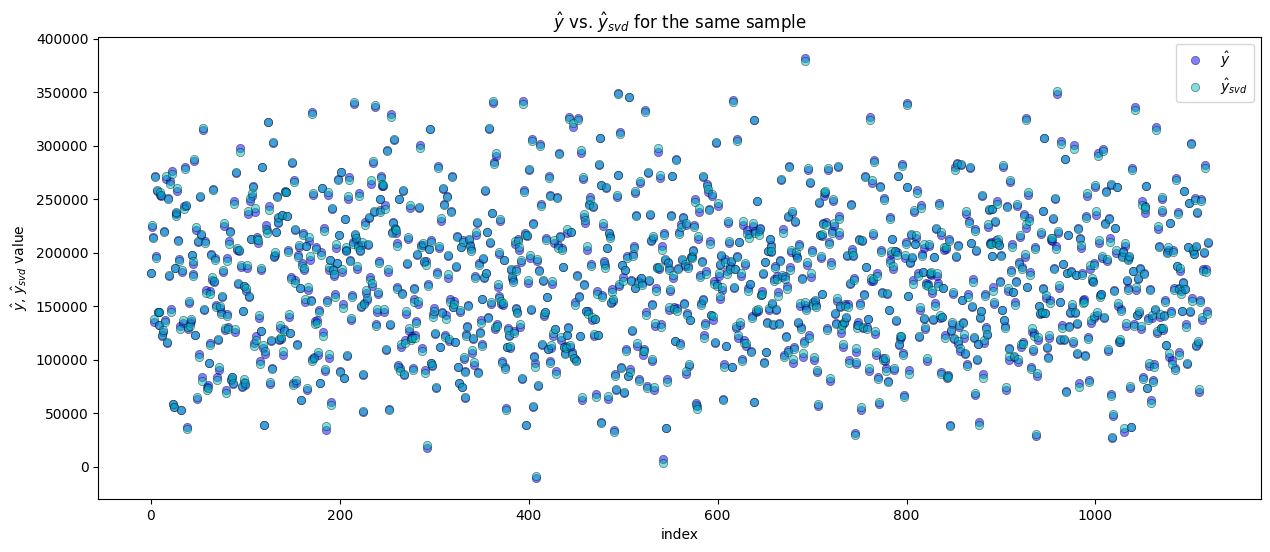

In [ ]:
fig = plt.figure(figsize = (15, 6))
plt.plot(range(len(y)), y_hat, 'bo', label = '$\hat{y}$', alpha=.5, markeredgecolor='k', markeredgewidth=0.5)
plt.plot(range(len(y)), y_hat_svd, 'co', label = '$\hat{y}_{svd}$', alpha=.5, markeredgecolor='k', markeredgewidth=0.5)
plt.legend()
plt.title('$\hat{y}$ vs. $\hat{y}_{svd}$ for the same sample')
plt.xlabel('index')
plt.ylabel('$\hat{y}$, $\hat{y}_{svd}$ value')
plt.show()


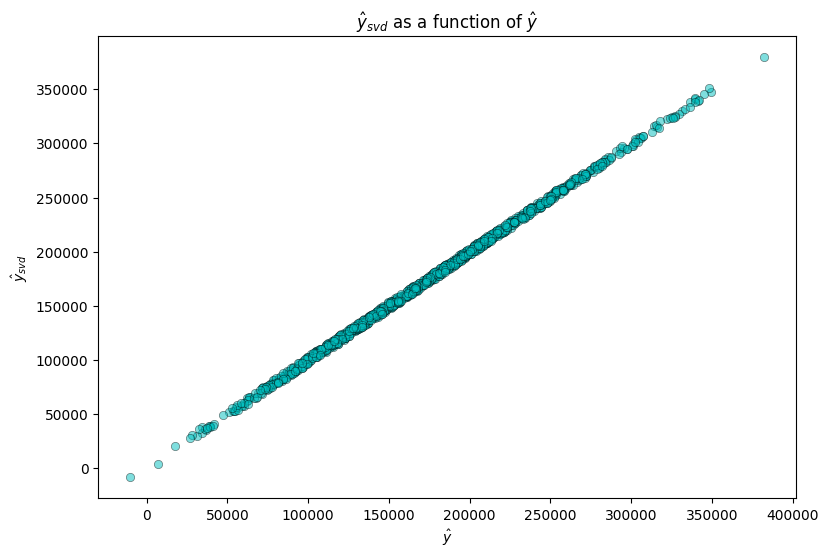

In [ ]:
fig = plt.figure(figsize = (9, 6))
plt.plot(y_hat, y_hat_svd, 'co', alpha=.5, markeredgecolor='k', markeredgewidth=0.5)
plt.title('$\hat{y}_{svd}$ as a function of $\hat{y}$')
plt.xlabel('$\hat{y}$')
plt.ylabel('$\hat{y}_{svd}$')
plt.show()


3. 

<ipython-input-58-e988f7099a85>:2: RuntimeWarning: invalid value encountered in log
  plt.stem(np.log(beta_hat) - np.log(beta_hat_svd))


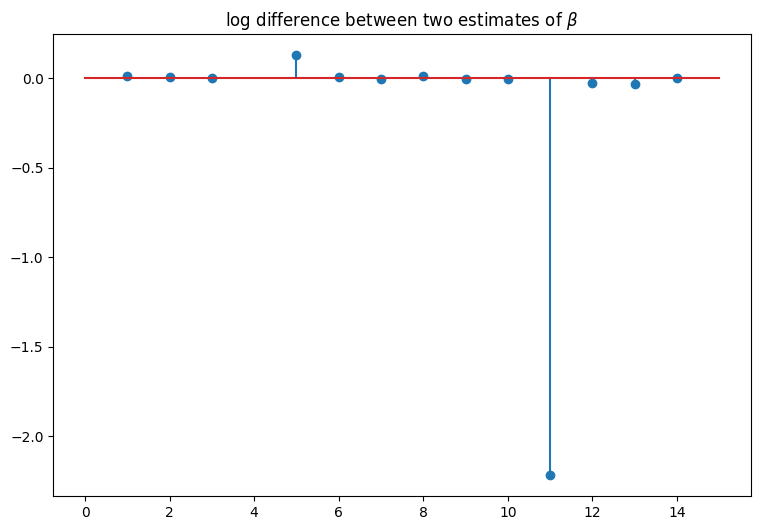

In [ ]:
fig = plt.figure(figsize = (9, 6))
plt.stem(np.log(beta_hat) - np.log(beta_hat_svd))
plt.title(r"log difference between two estimates of $\beta$")
plt.show()